# Technical: How to open this notebook <a class="tocSkip">
- You can always open it in `nbviewer` online, by clicking [here](https://nbviewer.jupyter.org/github/alex-bochkarev/SMTB-Algo/blob/master/2020-07_SMTB_Algo_AB.ipynb) -- read-only
- If you have a Google account (which is free), you can
[![Open it in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alex-bochkarev/SMTB-Algo/blob/master/2020-07_SMTB_Algo_AB.ipynb)

(You'd need to copy it to your Drive to be able to experiment and save your changes)
- If for any reason you'd prefer to run it locally, you can [clone](https://docs.github.com/en/github/creating-cloning-and-archiving-repositories/cloning-a-repository) (or just [download](https://github.com/alex-bochkarev/SMTB-Algo/archive/master.zip)) the [repo](https://github.com/alex-bochkarev/SMTB-Algo) and open the `.ipynb` file. You'd need Python 3 along with the following packages: `numpy`,`matplotlib`, `seaborn`, and `pandas` (almost surely you already have these). 
- Anyways, if you miss something and use `conda` (which you hopefully do) -- just `conda install <what-is-missing>`.
- **YOUR COMMENTS AND FEEDBACK ARE VERY WELCOME!**

**Note:** The presentation was made from this very notebook (using [RISE](https://rise.readthedocs.io/en/stable/) extension from time to time to produce [Reveal.js](https://revealjs.com/) slides)

In [1]:
# import some libraries first
import numpy as np # numbers/arrays manipulation
from time import time # to check runtimes
import pandas as pd # data/tables manipulation
from math import log, log2
# now, some graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Some key concepts about algorithms (in general) <a class="tocSkip">
<br><br><br>

<div style="text-align: right"> <em>Alexey Bochkarev, 2020, a [at] bochkarev (dot) io </em></div>

# An outline <a class="tocSkip">
- An algorithm = a recipe
- Several **parameters** to keep an eye on: 
    + runtime/types of runtime / $O(\cdot)$ notation / etc.
    + space requirements
- "Hard" problems, exact algos and heuristics.
- A note on **data structures**
- **the main part of the session:** conclusions + further reading/learning

# The main goal <a class="tocSkip">
    
- To *mention* some key definitions and "buzzwords", 
- To provide a first glimpse on the structure of the material out there. **(not a substitute to a proper CS course)**
- So you could learn more if needed, and know what to google.
    
**Why bother?**
- to create / implement algorithms
- to understand what is going on in a paper
- to understand what is possible (or not), and what to use for your problem at hand
    
**Prereqs:** ability to read (pseudo-)code -- we will use Python 3 now.

# Algorithms

## What is an algorithm?
Well, a recipe. Not good as a strict definition, but as put by [The Economist](https://www.economist.com/the-economist-explains/2017/08/29/what-are-algorithms),

*An algorithm is, essentially, a brainless way of doing clever things.*

A clear, step-by-step instructions manual, how to acheive something specific. Like, 
- get to the bus stop from some specific point, 
- sort an array of $N$ numbers, or
- assemble the original genome sequence from a smaller, potentially overlapping pieces. 
- ...and so on.

(Without too vague instructions.)

Not a big deal, so far...

**Note:** algorithm $\neq$ computer program. The former are abstract solution procedures, while the latter are their implementations in some specific programming language.

We will talk about **algorithms** today -- but we'll consider some specific examples of programs too. I suppose, it will be a little easier this way.

### Let's use sorting <a class="tocSkip">
**INPUT:**   an array of some fixed length, $N$. Say, integer numbers<br>
**OUTPUT:**  a sorted version of the same array (each next number is larger than the previous one).
    
For example, [4,6,1,3,2,5,7] $\rightarrow$ [1,2,3,4,5,6,7]. Obviously, there are many ways to approach the problem.

In [2]:
def bubble_sort(input_array):
    """Sorts the `input_array` with Bubble sort algorithm    
    (see https://en.wikipedia.org/wiki/Bubble_sort for more info)
    
    Returns sorted array
    """
    
    done = False
    N = len(input_array)
    out_array = input_array
    while not done:
        done = True
        for i in range(N-1):
            if out_array[i] > out_array[i+1]:
                n_i = out_array[i]
                n_i_plus_1 = out_array[i+1]
                out_array[i] = n_i_plus_1
                out_array[i+1] = n_i
                done = False
                
    return out_array

In [3]:
bubble_sort([4,6,1,3,2,5,7])

[1, 2, 3, 4, 5, 6, 7]

In [4]:
bubble_sort([6,4,7,1,2])

[1, 2, 4, 6, 7]

### Is it the only option, though? <a class="tocSkip">
(also see the mandatory [xkcd](https://xkcd.com/1185/); don't try to run at home :))

In [5]:
def panic_sort(input_array):
    """Sorts `input_array` with a famous (although, non-existent)
    panic sort algorithm
    
    Returns "sorted" array.
    """
    np.random.seed(1234)
    
    output_array = input_array # uh, okay, let's start somewhere
    
    for i in range(1000):
        output_array = np.random.permutation(output_array) ## come on, come on!..
        
    return output_array

In [6]:
A = [3,7,9,8,6,2,5,1,10,4]
panic_sort(A)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### or (this one is tricky): <a class="tocSkip">

In [7]:
def real_quick_sort(input_array):
    """*Kinda* sorts `input_array` by returning consecutive numbers 1,..,N
    (where N is the length of `input_array`)
    """
    
    N = len(input_array)
    
    return(
        [i+1 for i in range(N)]
    )

In [8]:
real_quick_sort([1,5,4,2,3])

[1, 2, 3, 4, 5]

In [9]:
real_quick_sort([4,6,1,3,2,5,7])

[1, 2, 3, 4, 5, 6, 7]

### Another approach: merge sort <a class="tocSkip">

Imagine an array, split it into two halves.What would happen if we had some magic function that would sort each half? We would have ended up with this:

![halfsorted](img/merge_sort.png)

Now, we could easily merge these two into a sorted array: just use two pointers `i left` and `i right`. Scan left to right, picking the smallest one and increasing pointers as necessary.

Let us just fix this in the code, while we are at it:

In [10]:
# the only slightly tricky part here is
# handling edge cases

def merge(left, right):
    """Merges arrays `left` and `right` into a single sorted (!) array
    **ASSUMING** that `left` and `right` were sorted before the call.
    
    Returns sorted array constructed from `left` and `right`
    """
    
    result = []
    i_left = 0; i_right = 0
    while len(result) < len(left) + len(right):
        if i_left == len(left):
            if i_right < len(right):                
                result.append(right[i_right])
                i_right += 1
        else:
            if i_right == len(right):
                result.append(left[i_left])
                i_left += 1
            else:
                result.append(min(right[i_right], left[i_left]))
                if right[i_right] < left[i_left]:
                    i_right += 1
                else:
                    i_left += 1
    return result

In [11]:
merge([1,3,5,7],[2,4,6])

[1, 2, 3, 4, 5, 6, 7]

OK, you might say, but we don't have any "magic function", do we?

Let's just cheat now, and pretend we do. This is best explained by code right away, perhaps:

In [12]:
def merge_sort(input_array):
    """Sorts `input_array` with merge sort
    (see, e.g., https://www.geeksforgeeks.org/merge-sort/ for quick description,
    or Wiki)
    
    Returns sorted array
    """
    result = []

    N = len(input_array)
    if N == 1:
        return input_array # nothing to sort
    
    m = N // 2 # find the middle
    left = input_array[:m]
    right = input_array[m:]
    
    # here is the magic
    left = merge_sort(left)
    right = merge_sort(right)
    
    return merge(left, right)

In [13]:
# In case you were hesitating:
merge_sort([4,6,1,3,2,5,7])

[1, 2, 3, 4, 5, 6, 7]

## Typical characteristics
- does it result in a desirable outcome? **(correctness)**
- how fast is it? **(runtime)**
- how much memory does it take? **(space/memory requirement)**

### Ok, let's start with correctness
Let's prepare a tiny testing unit to check if our algorithms work. It won't guarantee anything, but would *suggest* that we haven't screwed up anywhere.

In [14]:
def get_consec_instance(N):
    """Generates a test instance of length `N`
    How: creates a random permutation of consecutive
    integers 1, ..., N.
    
    Returns: sorted array and unsorted array
    """
    
    input_sorted = [i+1 for i in range(N)] # generate a sequence of numbers
    
    rng = np.random.default_rng() # initialize a random number generator
    input_unsorted = rng.permutation(input_sorted)
    return input_sorted, input_unsorted

def get_rnd_instance(N):
    """Generates a test instance of length `N`
    HOW: creates a sorted array first (by adding random numbers consecutively),
    then returns a random permutation of the sorted array.
    
    
    Returns: sorted array and unsorted array
    """
    
    input_sorted = [0 for i in range(N)]
    
    rng = np.random.default_rng()
    input_sorted[0] = rng.integers(low=0, high=N)
    
    for i in range(1,N):
        input_sorted[i] = input_sorted[i-1] + rng.integers(low=0, high=N)
        
    input_unsorted = rng.permutation(input_sorted)

    return input_sorted, input_unsorted

In [21]:
get_consec_instance(10)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 array([ 6,  4,  1,  7, 10,  3,  8,  5,  2,  9]))

In [25]:
get_rnd_instance(10)

([8, 13, 15, 18, 19, 27, 29, 37, 37, 41],
 array([37, 15, 18, 13, 41, 37, 27,  8, 19, 29]))

In [26]:
def test_algo(label, sort_function, instances_list):
    """Tests given algorithm against a set of instances
    Input:
        `label`          -- algorithm label to print (string)
        `sort_function`  -- algorithm implementation (function)
        `instances_list` -- a list of instances, each element represents 
                            a pair of versions (sorted, unsorted)
    
    Returns: nothing. Prints summary to the screen. For each instance:
        a dot (.) if successful, instance summary if not.
    """
    
    print("Testing algo: `{}`".format(label))

    n_failed = 0
    for instance in instances_list:
        arr_sorted, arr_unsorted = instance
        out = sort_function(arr_unsorted)
        if np.all(out == arr_sorted):
            print(".", end="")
        else:
            print(f"\nFAIL: expected {arr_sorted}, returned {out}", end="")
            n_failed += 1
    print(f"\ndone. FAILS: {n_failed} out of {len(instances_list)}")

OK, let's see if our algorithms work:

In [27]:
np.random.seed()
instances_list = [get_consec_instance(10) for _ in range(50)] + [get_rnd_instance(10) for _ in range(50)]

for sorting_func, label in [
    (bubble_sort, "Bubble sort"), 
    (merge_sort, "Merge sort"), 
    (panic_sort, "Panic sort"), 
    (real_quick_sort, "Real quick sort")]:
    
    print("==================================================")
    test_algo(label, sorting_func, instances_list)

Testing algo: `Bubble sort`
....................................................................................................
done. FAILS: 0 out of 100
Testing algo: `Merge sort`
....................................................................................................
done. FAILS: 0 out of 100
Testing algo: `Panic sort`

FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 8  6  1 10  7  5  2  4  3  9]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 8  6  1 10  7  5  2  4  3  9]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 8  6  1 10  7  5  2  4  3  9]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 8  6  1 10  7  5  2  4  3  9]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 8  6  1 10  7  5  2  4  3  9]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 8  6  1 10  7  5  2  4  3  9]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], returned [ 8  6  1 10  7  5  2  4  3  9]
FAIL: expected [1, 2, 3, 4, 5, 6, 7, 8, 

FAIL: expected [9, 12, 13, 17, 21, 25, 31, 31, 32, 32], returned [31 25  9 32 31 21 12 17 13 32]
FAIL: expected [6, 14, 21, 22, 24, 33, 37, 46, 47, 54], returned [46 33  6 54 37 24 14 22 21 47]
FAIL: expected [1, 4, 4, 9, 18, 24, 26, 26, 30, 34], returned [26 24  1 34 26 18  4  9  4 30]
FAIL: expected [9, 13, 14, 18, 27, 33, 41, 50, 58, 63], returned [50 33  9 63 41 27 13 18 14 58]
FAIL: expected [3, 12, 14, 21, 27, 35, 42, 49, 58, 58], returned [49 35  3 58 42 27 12 21 14 58]
FAIL: expected [2, 6, 8, 16, 25, 33, 33, 34, 35, 37], returned [34 33  2 37 33 25  6 16  8 35]
FAIL: expected [8, 16, 18, 21, 24, 33, 36, 39, 44, 50], returned [39 33  8 50 36 24 16 21 18 44]
FAIL: expected [0, 6, 14, 22, 31, 37, 43, 48, 54, 54], returned [48 37  0 54 43 31  6 22 14 54]
FAIL: expected [2, 6, 14, 22, 26, 26, 34, 42, 49, 57], returned [42 26  2 57 34 26  6 22 14 49]
FAIL: expected [8, 10, 12, 16, 20, 24, 32, 36, 36, 45], returned [36 24  8 45 32 20 10 16 12 36]
FAIL: expected [7, 14, 23, 30, 36, 39

(This "real quick sort" is not completely "fake", though. It is okay assuming you know something about your `input_array`. If interested, see [Bucket sort](https://en.wikipedia.org/wiki/Bucket_sort), [Radix sort](https://en.wikipedia.org/wiki/Radix_sort) and such)

### Runtime

Everyone is data-driven now, right? -- so let's just make some data (again) and see how these different approaches perform.

In [28]:
def get_runtimes(sort_function, gen_function=get_rnd_instance, N=100, no_inst = 100):
    """generates instances, tests the `sort_function` and returns a list of runtimes"""
    
    runtimes = []
    for i in range(no_inst):
        _, arr_input = gen_function(N)
        t0 = time()
        out = sort_function(arr_input)
        t1 = time()
        runtimes.append(t1-t0) # runtime in seconds
    return runtimes

In [29]:
def make_runtimes_plot(gen_function = get_rnd_instance, N = 10, no_inst=100):
    """creates a simple runtimes plot"""
    
    runtimes = pd.DataFrame(data = {
        'Bubble_sort' : get_runtimes(bubble_sort, gen_function, N, no_inst),
        'Merge_sort' : get_runtimes(merge_sort, gen_function)
    }, columns = ['Bubble_sort', 'Merge_sort'])

    ax = sns.stripplot(y = runtimes["Bubble_sort"]*1000., color='red', jitter=True)
    ax = sns.stripplot(y = runtimes['Merge_sort']*1000., color='blue', ax = ax, jitter = True)
    ax.set(xlabel='red = bubble sort, blue = merge sort, N={}'.format(N), ylabel='runtimes, msec')
    return ax



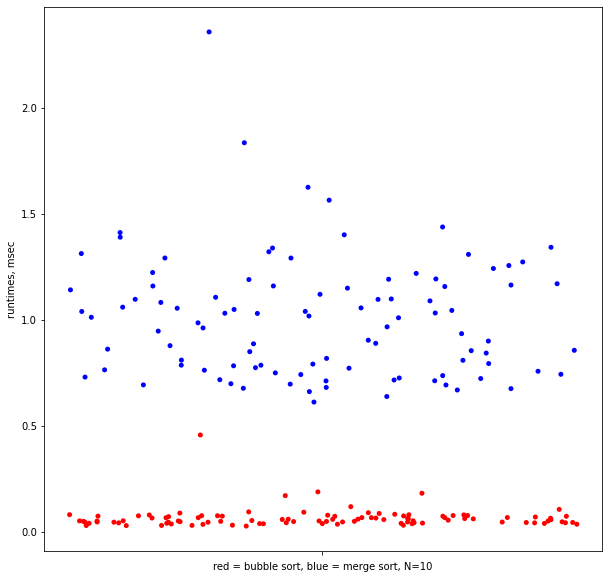

In [30]:
plt.figure(figsize = (10,10))
make_runtimes_plot()

### However, there are some problems with this approach.

### Problem 1: scaling
First, let us consider what happens as we change the length of the input. It is what usually matters -- how does our algorithm *scale* (no one is really interested in sorting arrays with `N=5`...)

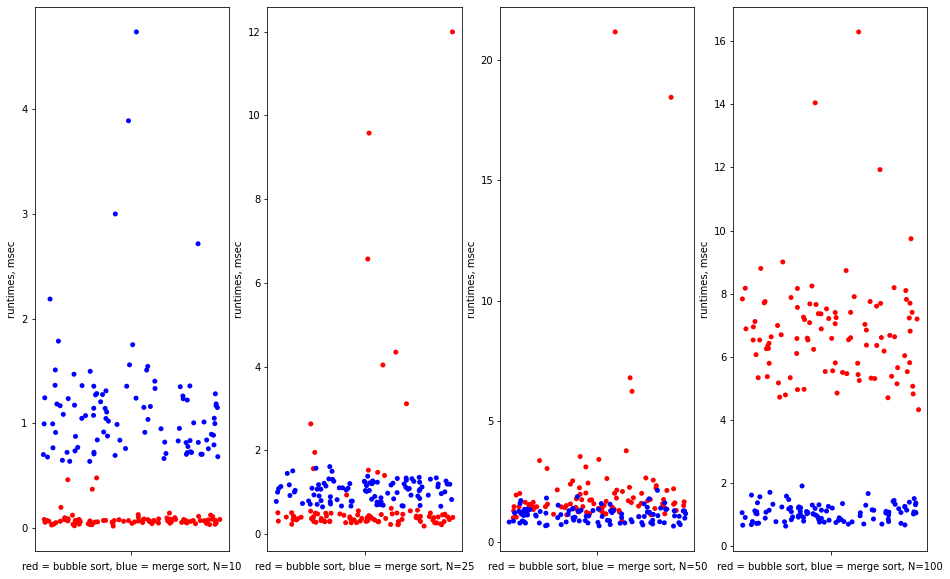

In [31]:
plt.figure(figsize = (16,10))
plt.subplot(1,4,1); make_runtimes_plot(N=10)

plt.subplot(1,4,2); make_runtimes_plot(N=25)

plt.subplot(1,4,3); make_runtimes_plot(N=50)

plt.subplot(1,4,4); make_runtimes_plot(N=100)

So okay, to understand what's going on here, we'd need to run the experiment for several different `N`-s. Say, let us plot mean runtimes instead...

In [32]:
def make_mean_runtimes(sort_function, gen_function = get_rnd_instance, N1 = 10, N2 = 100, no_inst=50):
    """creates a list of **mean** runtimes for different values of N"""
    
    runtimes = []
    for i in range(N2-N1):
        runtimes.append(np.mean(get_runtimes(sort_function, gen_function, N = N1 + i, no_inst = no_inst))*1000)
    
    return runtimes

N1 = 5; N2 = 100

rt_bsort = make_mean_runtimes(bubble_sort, N1=N1, N2 = N2)
rt_msort = make_mean_runtimes(merge_sort, N1=N1, N2 = N2)

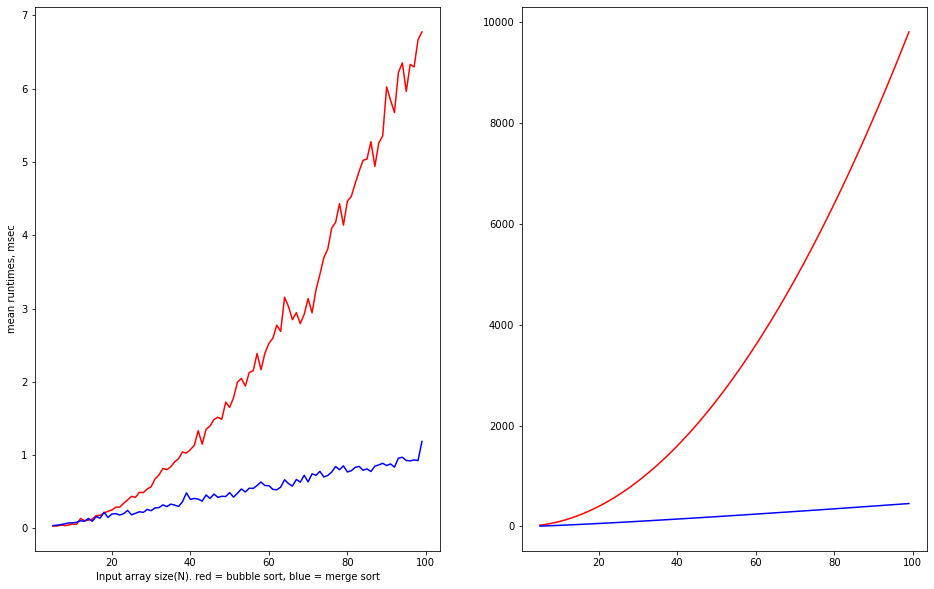

In [33]:
plt.figure(figsize = (16,10))
plt.subplot(1,2,1)
plt.plot([N1 + i for i in range(N2-N1)], rt_bsort, 'r-')
plt.plot([N1 + i for i in range(N2-N1)], rt_msort, 'b-')
plt.gca().set(xlabel='Input array size(N). red = bubble sort, blue = merge sort', ylabel='mean runtimes, msec')
plt.subplot(1,2,2)
plt.plot([N1 + i for i in range(N2-N1)], [x*x for x in range(N1, N2)], 'r-')
plt.plot([N1 + i for i in range(N2-N1)], [x*log(x) for x in range(N1,N2)], 'b-')

### Problem 2: special inputs
Then, let us feed in some pretty special inputs:

In [34]:
def gen_magic_sequence(N):
    """Generates a "special" input sequence (with only two elements swapped)"""
    
    input_sorted = [i+1 for i in range(N)] # generate a sequence of numbers
    input_unsorted = [i+1 for i in range(N)]
    a = input_unsorted[N // 2]
    b = input_unsorted[N // 2 + 1]
    input_unsorted[N // 2] = b; input_unsorted[N // 2 + 1] = a # how 'bout this?!
    
    return input_sorted, input_unsorted

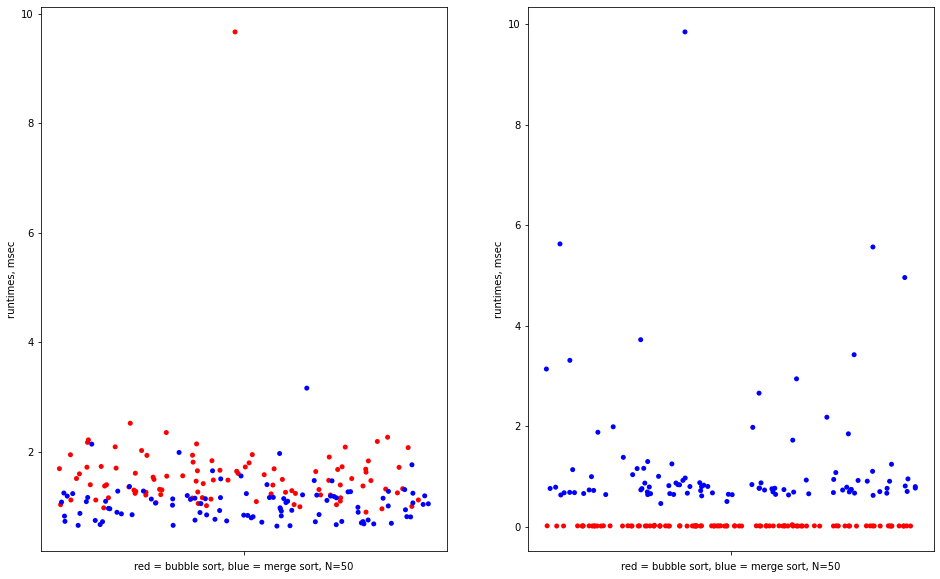

In [35]:
plt.figure(figsize = (16,10))
plt.subplot(1,2,1); make_runtimes_plot(N=50)
plt.subplot(1,2,2); make_runtimes_plot(gen_magic_sequence, N=50)

In [36]:
rt_bsort_m = make_mean_runtimes(bubble_sort, gen_function=gen_magic_sequence, N1=N1, N2 = N2)
rt_msort_m = make_mean_runtimes(merge_sort,  gen_function=gen_magic_sequence, N1=N1, N2 = N2)

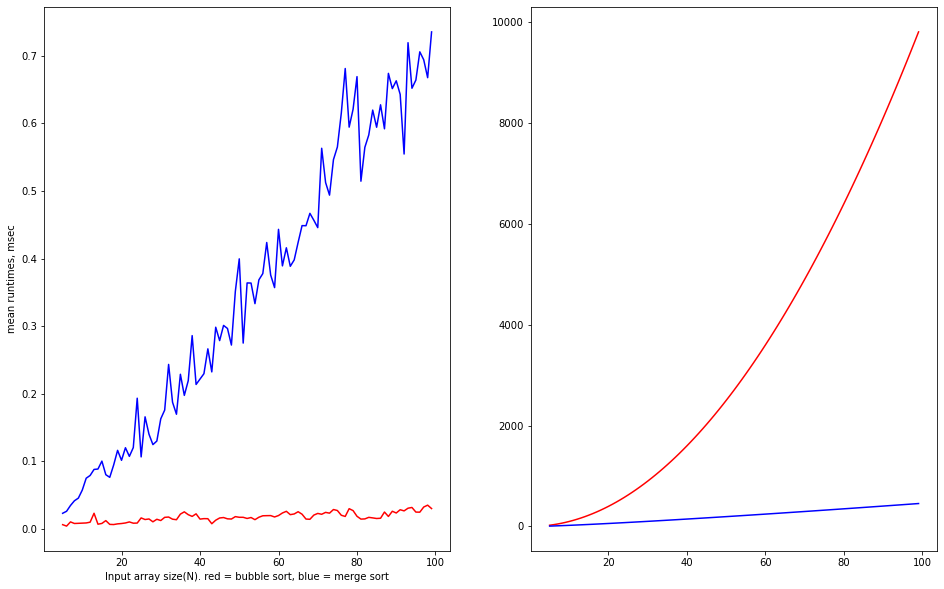

In [37]:
plt.figure(figsize = (16,10))
plt.subplot(1,2,1)
plt.plot([N1 + i for i in range(N2-N1)], rt_bsort_m, 'r-')
plt.plot([N1 + i for i in range(N2-N1)], rt_msort_m, 'b-')
plt.gca().set(xlabel='Input array size(N). red = bubble sort, blue = merge sort', ylabel='mean runtimes, msec')
plt.subplot(1,2,2)
plt.plot([N1 + i for i in range(N2-N1)], [x*x for x in range(N1, N2)], 'r-')
plt.plot([N1 + i for i in range(N2-N1)], [x*log(x) for x in range(N1,N2)], 'b-')

so the question is...

... WHAT. IS. **THIS** ?!

And the answer is: well, it depends on input! (surprise!). So, intuitively, we'd want to differentiate between the *worst-case*, *best-case*, and *average* performance (whatever it all would mean, precisely).

Actually, what we see, say, on Wiki [page](https://en.wikipedia.org/wiki/Merge_sort) describing an alorithm, is exactly this.

Therefore, people quite often talk about the *asymptotic worst-case runtime*. Now you have seen what (almost) each word means :)


### So, what to do?
Quite often you can see this $O(\cdot)$ notation. This is an *upper bound* on the respective runtime (say, on the *worst-case* performance). What is meant, usually, is this is how the runtime behaves as the *size* of the problem increases infinitely. For our case, the problem size is, naturally, $N$ -- how many numbers are there in the array.

People usually do not care about multiplicative constants (since $Ax^3$ will grow more than $Bx^2$, eventually, for any $A,B>0$ and $x>0$). This allows to disregard details and just count operations that do not depend on the input size. Let's consider an example.

More **formally**: runtime $T(n) \in O(g(n))$ if and only if there exists some $n_0 > 0$ and $C > 0$ such that for all $n>n_0:~T(n)\leq Cg(n)$.

Hey, asymptotics is a big deal, actually:

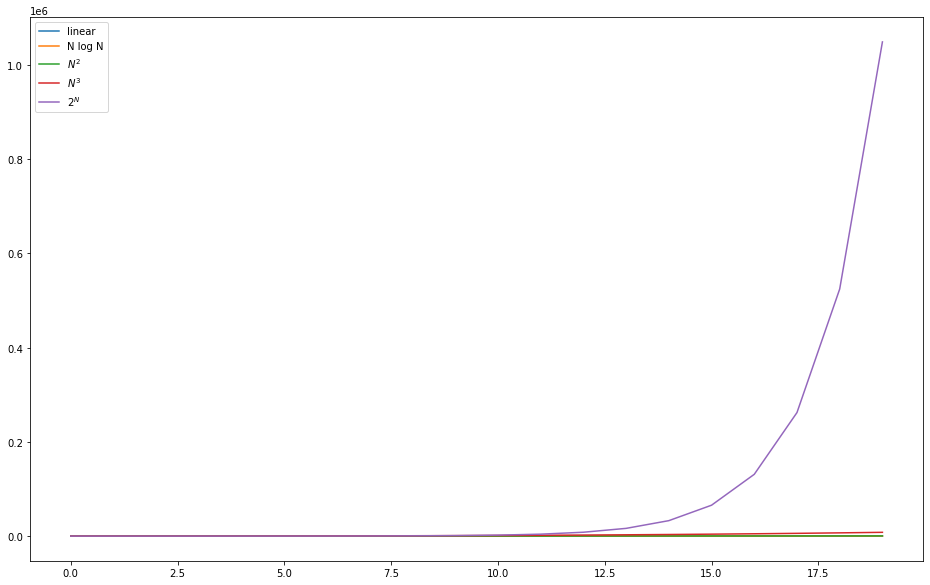

In [41]:
ns = [n for n in range(1,21)]

plt.figure(figsize = (16,10))
plt.plot(ns, label="linear")
plt.plot([n * log(n) for n in ns], label="N log N")
plt.plot([n**2 for n in ns], label="$N^2$")
plt.plot([n**3 for n in ns], label="$N^3$")
plt.plot([2**n for n in ns], label="$2^N$")
plt.legend()

- **For the bubble sort:** 
    + In the worst case, we will have to flip every one of the $N$ numbers with every other (if the input array is sorted, but in the wrong way -- e.g., in descending instead of ascending order). 
    + Then, we will have to perform $N(N-1)$ swap operations -- at most, regardless of anything. 
    + This is $N^2-N$, which still grows as fast as $N^2$, as $N$ increases infinitely. 
    
So, we'd write it as "bubble sort worst-case runtime is in $O(N^2)$". (There is no way it could run slower, right?)


- **For the merge sort:** let's consider what it does. 
    + Every `merge` operation takes $O(N)$ time, since it performs at most $N$ "ticks" while merging. We'd just need to count how many times this function could be invoked. 
    + Well, this is easy: this is the number of times we can divide $N$ into two, since each time we split it in two halves. 
    + If you think about it, this is the largest number $k$ such that $2^k \leq N$. We can use a slight overestimate, a number $k$ such that $2^k=N$, which mathematicians call $\log_2 N$. 
    + Therefore, we can say that we invoke the `merge` function (which takes $O(N)$ time), $\log_2 N$ times.
    
So, the asymptotic worst-case runtime of the merge sort is $O(N \log N)$ (computer science people sometimes omit this subscript of $2$, if most of the logarithms are base-two. And also it doesn't matter in $O(\cdot)$ notation if you recall properties of the logarithm...).

So, let's recap. What is the worst-case runtime for merge sort?

- $O(N\log N)$
- $O(N^2)$
- $O(N^3)$
- $O(2^{2^N})$

Well, technically, **all** are correct :). It is just an upper bound. But it is usually the tight one we care about.

Sometimes we want to know what is the least possible asymptotic runtime -- there is a special notation for that. For example, the bubble sort cannot make fewer than $O(N)$ elementary operations (it needs to scan the array, at the very least). Although, our magic in `merge_sort` procedure implies that we are always making $O(N\log N)$ steps, no matter the initial data! (hence the last "strange" figure of runtimes)

If interested, google Omega and Theta notations (e.g., see the [Wiki](https://en.wikipedia.org/wiki/Big_O_notation). But probably better explained in the intro chapter of a textbook).

**Also:** in some cases, the hidden constant does matter -- so in the end of the day, for relatively simple/known problems: if you can, just google what's the best algorithm.

### The final remark on this
In practice, please do sorting like this, unless it is necessary to do otherwise:

In [42]:
np.sort([1,5,2,7,3,4,1])

array([1, 1, 2, 3, 4, 5, 7])

In [43]:
# or, if you want to look fancy:
np.sort([1,5,2,7,3,4,1], kind='mergesort')

array([1, 1, 2, 3, 4, 5, 7])

No need to reinvent the bicycle. There are many algorithms already implemented for you in several great libraries. For example, lots of useful things are in [scikit-learn](https://scikit-learn.org/stable/) and (as you can tell even from this notebook) [numpy](https://numpy.org/), and so on. So if you are thinking to implement something -- a good first step is

**!! to look around, maybe something is already implemented !!**

(and chances are, with high-quality code, with support for special hardware, if needed, etc.).

## NP-hard problems

It seems that not all problems are solvable in polynomial time (in general case). There is a class of problems such that:
- a (given) solution can be *verified* in polynomial time,
- but no known algorithm exists to solve it (i.e., find a solution in first place) in polynomial time. (**OR:** actually, solving it in polynomial time would allow to solve some more really hard problems in polynomial time)

Is is a little more complicated than that, actually -- you can check out the concepts of [NP-hardness](https://en.wikipedia.org/wiki/NP-hardness), and [P vs NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) problem, if you are interested. But if so, picking up a Computer Science textbook (or a course) might be a good idea...

In practice, it means that there is a big class of (relevant) problems, that do not allow for efficient exact solution. In this case people sometimes try to devise *approximate* algorithms (and sometimes, pretty successfully). OR even heuristics (that just gives "kinda okay" solutions, without any guarantees... pretty good in practice sometimes, though).

Selecting optimal phylogenetic trees / multiple sequence alignment (see, e.g., [wiki](https://en.wikipedia.org/wiki/Sequence_alignment)), [k-means](https://en.wikipedia.org/wiki/K-means_clustering) clustering, and many others are "computationally difficult". Also, see the [List](https://en.wikipedia.org/wiki/List_of_NP-complete_problems) of NP-complete problems for some more examples.

## A note: space requirements
You can use this $O(\cdot)$ notation to analyze other requirements as well: for example, how much space does your (or someone else's) algorithm requires. For example, note that bubble sort does not require additional space (it can run over the same input array, *in-place*), while our implementation of merge sort required $O(N)$ units of additional memory.

# Data structures

Usually what we mean is: an abstract description of the data type. E.g., the stuff that keeps an ordered list of $N$ elements, requires $O(N)$ space, and supports:
- `access`($i$) -- accesses the $i$-th element, in $O(1)$ time;
- `modify`($i,e$) -- sets the $i$-th element to $e$, in $O(1)$ time;
- `delete`($i$) -- deletes the $i$-th element, in $O(N)$ time,
- `insert`($i,e$) -- inserts the element $e$ after position $i$, in $O(N)$ time.

Which is ... ?

In [44]:
# well, yes
A = np.array(["el-1","el-2","el-3","el-4","el-5"])
print(f"A[2]={A[2]}")

A[2] = "el-E"
print(f"now A[2]={A[2]}")

A[2]=el-3
now A[2]=el-E


What if I wanted to insert often (say, within a loop), after the last element -- but would be okay with compromising on the `access` runtime? 

In [45]:
D = []
runtimes = []
for i in range(10000):
    t0 = time()
    for k in range(10):
        D = D + ["my new element"]
    t1 = time()
    runtimes.append(t1-t0)

In [46]:
D[-5:]

['my new element',
 'my new element',
 'my new element',
 'my new element',
 'my new element']

In [47]:
len(D)

100000

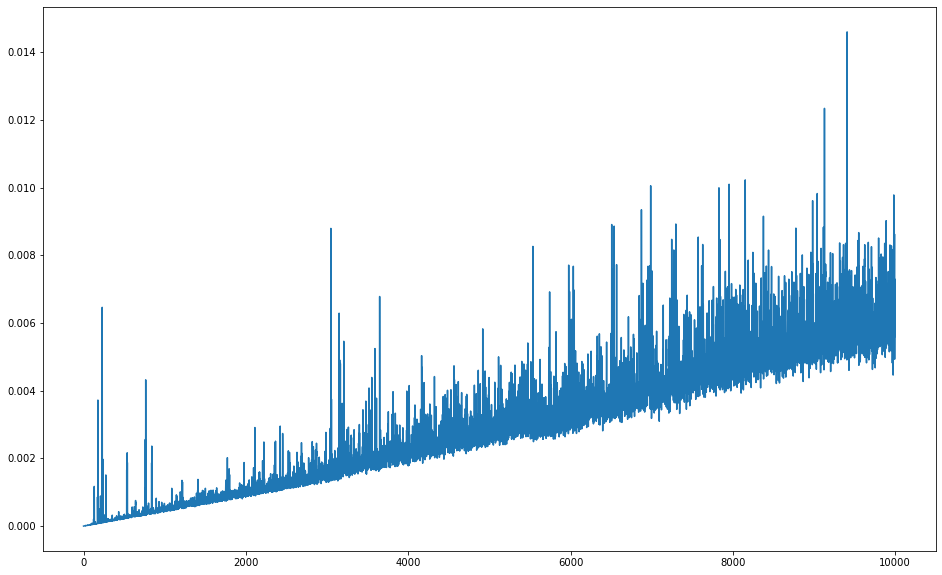

In [48]:
plt.figure(figsize = (16,10))
plt.plot(runtimes)

Now, enter **link lists**. For every number, let's just keep a pointer to the next number:

<img src="img/linked_list.png" alt="Linked list illustration" style="width: 800px;"/>

In [49]:
class MyNode:
    """describes a node in the linked list"""
    
    def __init__(self, data, next_node):
        """constructor: invoked when the object is created"""
        self.my_data = data
        self.next_node = next_node
        
    def find(self, what):
        """find method (looks for `what` in this or next nodes)"""
        
        if self.my_data == what:
            return self
        else:
            if self.next_node is None:
                return None
            else:
                return self.next_node.find(what)

    def __str__(self):
        """auxiliary function, so we could just print(MyNode)"""
        
        return self.my_data

class MyLinkedList:
    """describes a simplistic Linked List data structure"""
    
    def __init__(self, root_data):
        """constructor: invoked when the new linked list is created"""
        
        self.root = MyNode(data = root_data, next_node = None)
        self.last = self.root
        
    def find(self, what):
        """finds `what` in the linked list"""
        return self.root.find(what)
    
    def append(self, with_what):
        """appends `with_what` to the end of the linked list"""
        self.last.next_node = MyNode(with_what, next_node = None)
        self.last = self.last.next_node

In [50]:
# let's test it
my_list = MyLinkedList("I am root")
my_list.append("Next el 1")
my_list.append("Next el 2")

print("Finding 'Next el 1': {}".format(my_list.find("Next el 1")))
print("Finding 'Next el 3': {}".format(my_list.find("Next el 3")))

Finding 'Next el 1': Next el 1
Finding 'Next el 3': None


In [51]:
my_list = MyLinkedList("I am root")

runtimes = []
for i in range(10000):
    t0 = time()
    for k in range(10):
        my_list.append("new element")
    t1 = time()
    runtimes.append(t1 - t0)

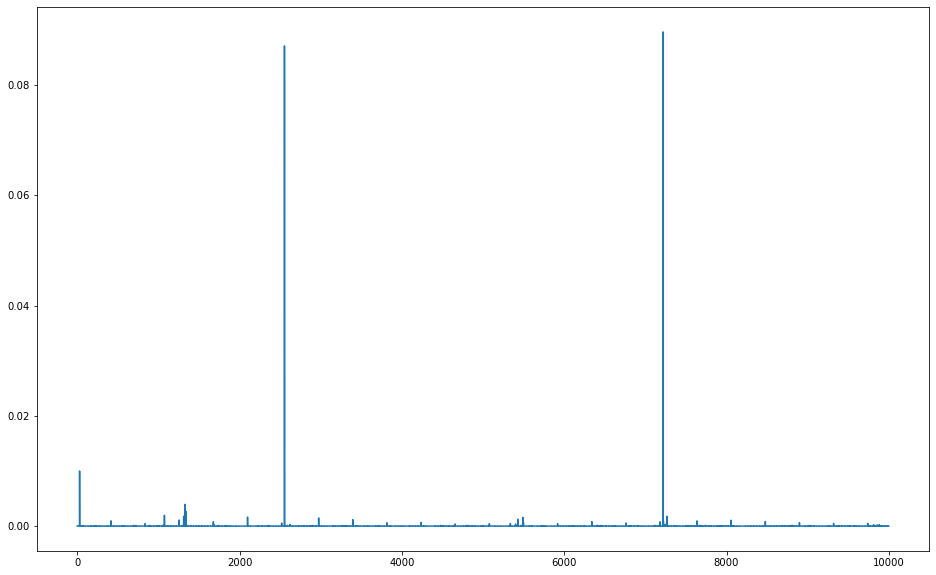

In [52]:
plt.figure(figsize = (16,10))
plt.plot(runtimes)

Okay, final example: assume you want a *dictionary* (and you do, quite often!). That is, have $N$ strings mapped to some interesting data, to have the ability to find them quickly.

How to implement it?
- naive way: just check all $N$ elements to find *the* one.
- a better way... ?

of course, sort them alphabetically! So, spend $O(N\log N)$-ish time once, and then enjoy... like $O(\log N)$ access time, if you split it in halves every time! 

No, seriously: for $N=$ 1,000,000 words, naive find checks, well, 1,000,000 elements. While the smarter implementation -- no more than:

In [53]:
round(log2(1000000))

20

Let's see, though, what the Python's built-in `dictionary` class (see the [docs](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) for more info) has to offer:

In [54]:
D = dict()
runtimes = []

for i in range(10000):
    t0 = time()
    for k in range(10):
        D["precious key {}/{}".format(i,k)] = "i={}, k={}".format(i,k)
    t1 = time()
    runtimes.append(t1-t0)

In [55]:
len(D)

100000

In [56]:
# as a "bonus" (actually, the whole point of it), we have:

D["precious key 5700/8"]

'i=5700, k=8'

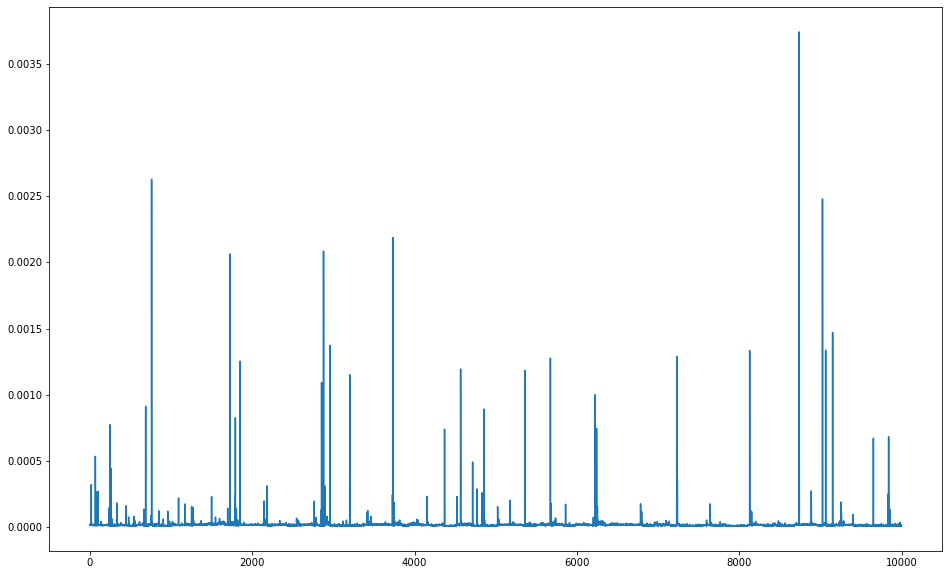

In [57]:
plt.figure(figsize = (16,10))
plt.plot(runtimes)

Wait, whaaat?! Why?! What's the... ?!

Indeed, it is constant-time access. $O(1)$. Kinda instantaneous.

And the answer is, of course, special CS black magic. Google "hash tables" if interested. Note, though, it is not a beginner material. You might be better served by a textbook. 

**PROTIP:** To use it, you don't really need to understand deeply what's going on under the hood.

The idea is: there are **a lot** of cool data structures out there. You might not need to know all, but remember google stuff if you are implementing something. Some examples include:
- linked lists, [queues](https://en.wikipedia.org/wiki/Queue_(abstract_data_type)) (`push`/`pop` operations a-la stack; $O(1)$ `insert`/`delete` operations), [deques](https://en.wikipedia.org/wiki/Double-ended_queue) (when you can slap an element in the beginning as well), etc.
- the all mighty dictionaries / [hash tables](https://en.wikipedia.org/wiki/Hash_table) (fast access/search times);
- the swiss army knife of CS, [binary search trees](https://en.wikipedia.org/wiki/Binary_search_tree) (well, do the binary search quickly :) ) and [heaps](https://en.wikipedia.org/wiki/Heap_(data_structure)) (find minimum in constant time. Guess what is a heap sort algo?)
- [union find](https://en.wikipedia.org/wiki/Disjoint-set_data_structure) -- keep track of a set partitioned into subsets. Very fast operations to: `union` two subsets and `find` if any two given elements are in the same subset.
- and quite some more...

There is some system here, like there are key topics: lists, hashing, trees, etc. Again, pick up a textbook if interested!

# Take-aways
- (Some) algorithms are cool
- They can (and should) be analyzed in a systematic, scientific way
- They are quite often characterized by runtime, space requirements, and correctness (obviously).
- Another important characteristic, which is slightly outside the scope if this talk, is whether it can use several parallel processes.
- Asymptotic runtime: $O(\cdot)$ (and Co.) notations describe how does the runtime grow as the problem size increases. 
- Yes, usually that's a big deal
- Sometimes we discuss best-case, worst-case, and average performance.
- Cool algorithms are numerous, and it is quite possible that there is one for your (arbitrary) problem at hand.
- Standard libraries are your friends (`numpy`, `sklearn`, etc. -- if we talk Python)
- If you are into *designing* (or understanding) algorithms, you'll need to get familiar with basic data structures. A good data structure is a game-changer. But this is a whole separate topic... Just make sure you know there is "dictionary"/hash table and binary search tree / heap out there (not necessarily how it works -- just what it does).

# The main part of the session: further reading
- [GeeksForGeeks](https://www.geeksforgeeks.org/merge-sort/), Wikipedia, etc. are quite good, sometimes.
- Docs for specific libraries (e.g., see sorting in [numpy docs](https://numpy.org/doc/stable/reference/generated/numpy.sort.html))
- There are some good "light" introductory textbooks:
    + Skiena "Algorithm Design Manual"
    + Kleinberg and Tardos, "Algorithm Design" (I thank Dr. Dean for recommendation)
- If you feel the need to practice, there are some good online courses out there. For example, Coursera:
    + [Analysis of Algorithms](https://www.coursera.org/learn/analysis-of-algorithms) from Princeton (by Dr. Sedgewick) -- some practice in Java.
    + [Algorithms specialization](https://www.coursera.org/specializations/algorithms) from Stanford -- this one might be math-heavy and more on the theoretical side.
    + there are more -- google, check reviews, try several, pick the one that you like.
    + might be a good idea to start one, go through the intro (but not necessarily finish).
- If you feel like watching some videos, I might recommend the MiT OCW  [6.006 "Intro to Algorithms"](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-006-introduction-to-algorithms-fall-2011/) course
- there are some more classic CS textbooks, which I would **not** recommend as an intro (you can google yourself as needed -- e.g., CLRS or Sedgewick's "Algorithms" books). That would be a little too dense for starters.
- **the ultimate thing:** TAOCP (just google "is TAOCP worth reading" or check an [HN question](https://news.ycombinator.com/item?id=10897460). It seems to be kind of popular discussion topic among CS people :) )